In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [53]:
pd.set_option('display.max_columns',None)

In [54]:
df = pd.read_csv('E:\Project\MachineLearning\HotelBooking\Data\hotel_bookings.csv')

In [55]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
df.isna().sum().sort_values()

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

In [58]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<h3> Khách hàng đến từ đâu trên thế giới

In [59]:
df['country'].value_counts().head(15)

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: count, dtype: int64

Ta thấy, các khách hàng chủ yếu đến nhiều nhất từ Bồ Đào Nha và các nước khác ở Châu Âu <br>
Khách hàng đặt phòng cũng đến từ các nơi trên thế giới


<h3>Khách hàng thường chi trả bao nhiêu tiền mỗi đêm 

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: xlabel='reserved_room_type', ylabel='adr'>

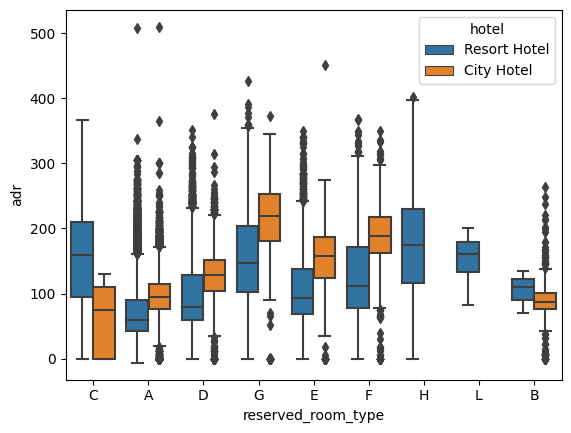

In [60]:
Data_khong_huy = df[df['is_canceled'] == 0]

sb.boxplot(data=Data_khong_huy, x='reserved_room_type', y='adr', hue='hotel')

In [61]:
Data_khong_huy['adr'].describe()

count    75166.000000
mean        99.987693
std         49.206263
min         -6.380000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

Đối với từng loại phòng khách nhau, khách hàng có thể chi trả số tiền khác nhau<br>
Đối với Resort Hotel:<br>
Phòng mã C: khoảng từ 100 đến 210<br>
Phòng mã A: khoảng từ 50 đến 100<br>
Phòng mã D: khoảng từ 70 đến 130<br>
Phòng mã G: khoảng từ 110 đến 200<br>
...<br>
Đối với City Hotel:<br>
Phòng mã C: khoảng từ 0 đến 115<br>
Phòng mã A: khoảng từ 85 đến 120<br>
Phòng mã D: khoảng từ 110 đến 140<br>
Phòng mã G: khoảng từ 170 đến 240<br>
...

<h3>Giá phòng biến đổi như thế nào qua các tháng

In [62]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [63]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [64]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [65]:
tonghop = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
tonghop.columns = ['Tháng', 'Giá của khách sạn Resort Hotel', 'Giá của khách sạn Resort Hotel']
tonghop

,Tháng,Giá của khách sạn Resort Hotel,Giá của khách sạn Resort Hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


<h3>Khách hàng thường ở lại bao nhiêu ngày trong khách sạn

In [66]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['Tháng','Số lượng khách']
resort_guests

,Tháng,Số lượng khách
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [67]:
city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['Tháng','Số lượng khách']
city_guests

,Tháng,Số lượng khách
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


<h3>Tháng nào khách sạn đông nhất

# Data Pre Processing

xử lý các thuộc tính null trong bộ dữ liệu 

điền giá trị thiêú của thuộc tính country là other

In [68]:
df['country'].fillna('Other',inplace=True)

In [69]:
print(df['country'].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Other' 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' '

Xóa hai cột agent và company vì có dữ liệu thiếu nhiều

In [70]:
df = df.drop(['agent','company'],axis=1)

tạo một thuộc tính mới từ children và babies và xóa hai cột cũ

In [71]:
df['children'].fillna(0,inplace=True)
df['kids'] = df['children'] + df['babies']
df = df.drop(['children','babies'], axis=1)
df['kids']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: kids, Length: 119390, dtype: float64

nếu adults và kids bằng 0 thì chuyến đi không có người nào hết 
-> dữ liệu nhiễu 

In [72]:
condition = (df['adults'] == 0) & (df['kids'] == 0)

df = df[~condition]

xóa reservation_status_date:


In [73]:
df = df.drop('reservation_status_date', axis=1)

tạo biến totalnights mới từ hai biến số đêm trong tuần và cuối tuần

In [74]:
df['TotalNights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df = df.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1)

 xóa hai cột 'arrival_date_month', 'arrival_date_week_number'

In [75]:
df = df.drop(['arrival_date_week_number'],axis=1)


In [76]:
df = df.drop(['market_segment','assigned_room_type'],axis=1)

In [77]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

chuyển đổi dữ liệu 


In [78]:
col_obj = df.select_dtypes('object').columns
col_obj

Index(['hotel', 'arrival_date_month', 'meal', 'country',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'reservation_status'],
      dtype='object')

In [79]:
df[col_obj]

,hotel,arrival_date_month,meal,country,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,PRT,Direct,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,PRT,Direct,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,GBR,Direct,A,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,GBR,Corporate,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,GBR,TA/TO,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,TA/TO,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,FRA,TA/TO,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,DEU,TA/TO,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,GBR,TA/TO,A,No Deposit,Transient,Check-Out


In [80]:
for i in col_obj:
    print(i, df[i].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal ['BB' 'FB' 'HB' 'SC' 'Undefined']
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Other' 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH'

In [81]:
labelEncoder = LabelEncoder()

for i in col_obj:
    df[i] = labelEncoder.fit_transform(df[i])

In [82]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,kids,TotalNights
0,1,0,342,2015,5,1,2,0,136,1,0,0,0,2,3,0,0,2,0.0,0,0,1,0.0,0
1,1,0,737,2015,5,1,2,0,136,1,0,0,0,2,4,0,0,2,0.0,0,0,1,0.0,0
2,1,0,7,2015,5,1,1,0,59,1,0,0,0,0,0,0,0,2,75.0,0,0,1,0.0,1
3,1,0,13,2015,5,1,1,0,59,0,0,0,0,0,0,0,0,2,75.0,0,0,1,0.0,1
4,1,0,14,2015,5,1,2,0,59,3,0,0,0,0,0,0,0,2,98.0,0,1,1,0.0,2


In [83]:
col = df.columns
col.size

24

In [84]:
col

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'kids', 'TotalNights'],
      dtype='object')

<Axes: >

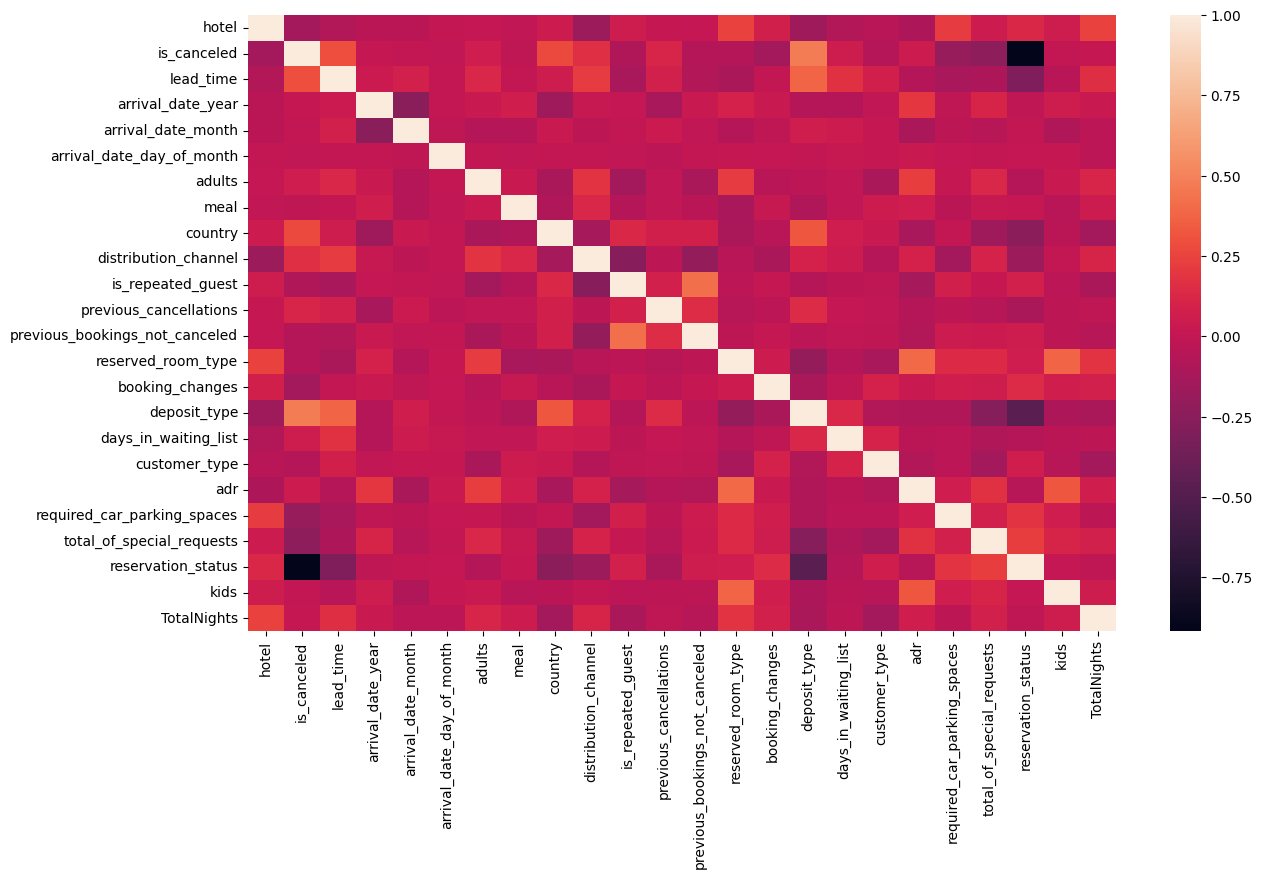

In [85]:

cor = df.corr()

plt.figure(figsize=(14,8))
sb.heatmap(cor)


In [86]:
correlation = df.corr()['is_canceled'].sort_values(ascending=False)
correlation

is_canceled                       1.000000
deposit_type                      0.468676
lead_time                         0.292876
country                           0.269265
distribution_channel              0.167707
previous_cancellations            0.110139
adults                            0.058182
days_in_waiting_list              0.054301
adr                               0.046492
TotalNights                       0.018554
arrival_date_year                 0.016622
arrival_date_month               -0.001269
kids                             -0.003006
arrival_date_day_of_month        -0.005948
meal                             -0.017227
previous_bookings_not_canceled   -0.057365
reserved_room_type               -0.062216
customer_type                    -0.068206
is_repeated_guest                -0.083745
hotel                            -0.137082
booking_changes                  -0.144832
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
reservation

In [87]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
adults                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
kids                              0
TotalNights                       0
dtype: int64

In [88]:
cat_col = df.columns
cat_col.size

24

In [89]:
print(cat_col)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_day_of_month', 'adults', 'meal',
       'country', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'kids', 'TotalNights'],
      dtype='object')


In [106]:
X = df.drop('hotel',axis=1).values
y = df['is_canceled'].values


In [107]:
import joblib
import pickle

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# Random forest

In [109]:
rd_clf = RandomForestClassifier(random_state=2023)

rd_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=2023)

In [110]:
y_pred = rd_clf.predict(X_test)

In [111]:
print(accuracy_score(y_pred,y_test))

1.0


In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22505
           1       1.00      1.00      1.00     13258

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [113]:
joblib.dump(rd_clf,'Rd_clf.pkl')

['Rd_clf_hotel.pkl']

In [ ]:
model = pickle.load()

# DecesionTree


In [114]:
det_clf = DecisionTreeClassifier(random_state=2023)

det_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2023)

In [115]:
y_pred_det = det_clf.predict(X_test)

In [116]:
print(classification_report(y_pred_det,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22505
           1       1.00      1.00      1.00     13258

    accuracy                           1.00     35763
   macro avg       1.00      1.00      1.00     35763
weighted avg       1.00      1.00      1.00     35763



In [117]:
joblib.dump(det_clf,'Det_clf_hotel.pkl')

['Det_clf_hotel.pkl']